# Assessment 2 - Juypter Notebook template

Hi there! It's Shilpa here from the analytics team.

I've gone ahead and put together this Jupyter Notebook template for you to work on.

It contains all the key questions we want to answer to address our client's needs.

The manager advised that you've been briefed on this project already, so your job now is to ‘fill in the blanks’ by implementing Python code to address the tasks and answer the questions in the Markdown below, as well as explaining what you are doing and discussing the results (by annotating the Notebook using Markdown cells).

We have already collected a dataset, which you have been provided (`Australia_Client_Tweets.csv`). Please use this dataset for your analysis.

Obviously, you will want to include more cells (both code and markdown) in the Notebook, but this provides a starting point. You may even want to reorganise the existing cells as you see fit.

Good luck and I look forward to seeing your code and results.

### 2. Importing CSV data into Python (Input Stage)

First, import the CSV data from the file `Australia_Client_Tweets.csv`.

In [475]:
# import libraries
import pandas as pd

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

# import data
data=pd.read_csv('/Users/jiechen/Desktop/CCQ107/assignment/Australia_Client_Tweets.csv',index_col=0)

#### Q1: How many tweets does our data contain, i.e., number of rows in the dataset?

In [476]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17967 entries, 0 to 17966
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 17967 non-null  int64  
 1   conversation_id    17967 non-null  int64  
 2   created_at         17967 non-null  int64  
 3   date               17967 non-null  object 
 4   time               17967 non-null  object 
 5   timezone           17967 non-null  object 
 6   user_id            17967 non-null  int64  
 7   username           17967 non-null  object 
 8   name               17967 non-null  object 
 9   place              57 non-null     object 
 10  tweet              17967 non-null  object 
 11  mentions           17949 non-null  object 
 12  urls               17967 non-null  object 
 13  photos             17967 non-null  object 
 14  replies_count      17967 non-null  int64  
 15  retweets_count     17967 non-null  int64  
 16  likes_count        179

In [477]:
# preview the first 5 rows of the loaded data
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,retweets_count,likes_count,location,hashtags,cashtags,link,retweet,quote_url,video,profile_image_url
0,1131417190240903168,1131152781136547840,1558585853000,2019-05-23,14:30:53,AEST,991608430258339840,preqcricket,Prequel,NaN,...,0,0,NaN,[],[],https://twitter.com/PreqCricket/status/1131417...,NaN,NaN,0,https://pbs.twimg.com/profile_images/101373811...
1,1131408404465954817,1131408404465954817,1558583758000,2019-05-23,13:55:58,AEST,1083685422222401536,nichinichisou1,nichinichisou,NaN,...,0,0,NaN,['#presidentscup'],[],https://twitter.com/nichinichisou1/status/1131...,NaN,https://twitter.com/PresidentsCup/status/11312...,0,https://pbs.twimg.com/profile_images/110856177...
2,1131403570182467584,1131152781136547840,1558582606000,2019-05-23,13:36:46,AEST,1127520860468736001,farah72415842,Farah,NaN,...,0,1,NaN,[],[],https://twitter.com/Farah72415842/status/11314...,NaN,NaN,0,https://abs.twimg.com/sticky/default_profile_i...
3,1131403417669312512,1131152781136547840,1558582569000,2019-05-23,13:36:09,AEST,962901643212869633,tracies89139325,Tracie Stewart,NaN,...,0,1,NaN,[],[],https://twitter.com/TracieS89139325/status/113...,NaN,NaN,0,https://pbs.twimg.com/profile_images/966175467...
4,1131403211288375297,1131152781136547840,1558582520000,2019-05-23,13:35:20,AEST,742181204443570177,addieperle1,Addie,NaN,...,0,2,NaN,[],[],https://twitter.com/addieperle1/status/1131403...,NaN,NaN,0,https://pbs.twimg.com/profile_images/111876996...


In [478]:
# convert the 'date' column into a proper time series format
data['date']=pd.to_datetime(data.date)

In [479]:
data.shape

(17967, 25)

In [480]:
data.drop_duplicates('id',inplace=True)

In [481]:
# use the shape method show the number of rows and columns
data.shape

(17967, 25)

#### A1: There are 17967 rows and 25 columns

#### Q2: What are the top 20 account names by number of likes (`likes_count` column)?

In [482]:
# group by username, sum the numbers of likes, Sort by number of likes
table1= data.groupby(['username'],as_index=False).agg({'likes_count':'sum'}).\
sort_values(by=['likes_count'],ascending=[False])

In [483]:
# top 20 account names by number of likes
table1['username'][:20]

953           australia
1193       bhogleharsha
8251            tomhall
8389     tropical_coast
1524          cairnsgbr
7793    sunshinecoastoz
3414          heronisle
2068     dallaskilponen
6889        robertirwin
6370          phlipvids
4344         kathylette
8660      visitbrisbane
2089     danieljgillies
3353          havenlust
8679         vogueindia
1811        cityofperth
5952              norks
925        ausoutbacknt
8780      westaustralia
8730    wandertowondero
Name: username, dtype: object

#### Q3: What are the top 20 account names by number of retweets (`retweets_count` column)?

In [484]:
# group by username, sum the numbers of retweets, Sort by number of retweets
table2= data.groupby(['username'],as_index=False).agg({'retweets_count':'sum'}).\
sort_values(by=['retweets_count'],ascending=[False])

In [485]:
# top 20 account names by number of retweets
table2.head(20)

,username,retweets_count
953,australia,62701
8251,tomhall,791
3414,heronisle,396
1524,cairnsgbr,324
8730,wandertowondero,306
8389,tropical_coast,290
1193,bhogleharsha,275
7793,sunshinecoastoz,273
8660,visitbrisbane,257
6370,phlipvids,256


#### Q4: Who are the top 20 most active users in terms of tweet activity?

By directly looking at these top 20 accounts, what kinds of accounts are they? Are they regular people, organisations, celebrities, or some other type? We are keen to better understand the demographic of Twitter users who are interacting a lot with the client.

In [486]:
# top 20 most active users in terms of tweet activity
data['username'].value_counts()[:20]

australia          445
kirbydwagner       266
tropical_coast     258
greatozgovtweet    141
gajphotography     120
cjmcginnis          96
daisyandrew2017     93
phlipvids           93
vansieds            89
zoehsewell          84
osaka79             84
whitecrestgor       71
johnnyjet           70
siamesecattwins     68
cvilagos            66
bluecrustprod       65
yodawondersan       62
pickyourtrail       61
westaustralia       58
over_expos_ed       53
Name: username, dtype: int64

Text(0.5, 1.0, 'Toop 20 Twitter accounts by tweet activity')

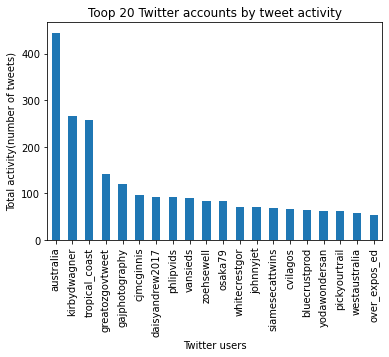

In [487]:
#plot the top 20 most active users in terms of tweet activity
data['username'].value_counts()[:20].plot(kind="bar")

plt.xlabel('Twitter users')
plt.ylabel('Total activity(number of tweets)')
plt.title('Toop 20 Twitter accounts by tweet activity')

#### A4:The top 20 active users are mainly official accounts, organisations and celebrities

#### Q5: What is the total number of favourites in the dataset?

In [488]:
sum(data.likes_count)

382760

#### A5: total number of favourites is 382760 in the dataset.

#### Q6: What is the total number of retweets in the dataset?

In [489]:
sum(data.retweets_count)

74005

#### A6: The total number of retweets is 74005 in the dataset

#### Q7: We would like to get a sense of the number of likes across the entire dataset. For instance, what's the average number of likes? What's a large amount of likes for a tweet? Can you help us get a better understanding of this?

In [490]:
# the statistical summary of the entire dataset
data.describe()

,id,conversation_id,created_at,user_id,replies_count,retweets_count,likes_count,location,retweet,video
count,1.796700e+04,1.796700e+04,1.796700e+04,1.796700e+04,17967.000000,17967.000000,17967.000000,0.0,0.0,17967.000000
mean,1.104719e+18,1.103690e+18,1.552220e+12,3.041649e+17,0.537151,4.118940,21.303501,NaN,NaN,0.035843
std,1.501609e+16,2.075408e+16,3.580116e+09,4.493682e+17,2.969069,32.596661,155.592716,NaN,NaN,0.185905
min,1.079893e+18,5.268473e+09,1.546302e+12,9.890000e+02,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,1.091776e+18,1.091136e+18,1.549135e+12,1.902044e+08,0.000000,0.000000,0.000000,NaN,NaN,0.000000
50%,1.103770e+18,1.103345e+18,1.551994e+12,1.839898e+09,0.000000,0.000000,1.000000,NaN,NaN,0.000000
75%,1.117528e+18,1.117152e+18,1.555274e+12,8.321288e+17,0.000000,0.000000,2.000000,NaN,NaN,0.000000
max,1.131417e+18,1.131408e+18,1.558586e+12,1.131070e+18,162.000000,1498.000000,6962.000000,NaN,NaN,1.000000


#### A7: Above is the statistical summary of the entire dataset. From the information above, we can see that the max number of likes is 6962, the average number of likes is 21.30. 

#### Q8: What about retweets - can you give us a summary of how many retweets is 'good', and what the average number of retweets is?

#### A8: More than 32 retweets is good. The average number of retweets is 4.12.

#### Q9: We want to know when during the week that our client is receiving the highest engagement.

What is the average retweet count for each day of the week, and what can you tell/show us about the results?

In [491]:
#create a new column named 'day_of_week'
data['day_of_week']= data.date.dt.day_name()

In [492]:
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,likes_count,location,hashtags,cashtags,link,retweet,quote_url,video,profile_image_url,day_of_week
0,1131417190240903168,1131152781136547840,1558585853000,2019-05-23,14:30:53,AEST,991608430258339840,preqcricket,Prequel,NaN,...,0,NaN,[],[],https://twitter.com/PreqCricket/status/1131417...,NaN,NaN,0,https://pbs.twimg.com/profile_images/101373811...,Thursday
1,1131408404465954817,1131408404465954817,1558583758000,2019-05-23,13:55:58,AEST,1083685422222401536,nichinichisou1,nichinichisou,NaN,...,0,NaN,['#presidentscup'],[],https://twitter.com/nichinichisou1/status/1131...,NaN,https://twitter.com/PresidentsCup/status/11312...,0,https://pbs.twimg.com/profile_images/110856177...,Thursday
2,1131403570182467584,1131152781136547840,1558582606000,2019-05-23,13:36:46,AEST,1127520860468736001,farah72415842,Farah,NaN,...,1,NaN,[],[],https://twitter.com/Farah72415842/status/11314...,NaN,NaN,0,https://abs.twimg.com/sticky/default_profile_i...,Thursday
3,1131403417669312512,1131152781136547840,1558582569000,2019-05-23,13:36:09,AEST,962901643212869633,tracies89139325,Tracie Stewart,NaN,...,1,NaN,[],[],https://twitter.com/TracieS89139325/status/113...,NaN,NaN,0,https://pbs.twimg.com/profile_images/966175467...,Thursday
4,1131403211288375297,1131152781136547840,1558582520000,2019-05-23,13:35:20,AEST,742181204443570177,addieperle1,Addie,NaN,...,2,NaN,[],[],https://twitter.com/addieperle1/status/1131403...,NaN,NaN,0,https://pbs.twimg.com/profile_images/111876996...,Thursday


Text(0, 6, 'The day with highest retweets')

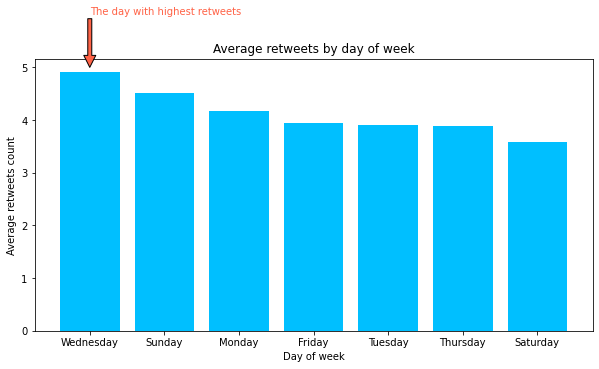

In [493]:
# create new data to get the average retweet count for each day of the week
table4=data.groupby(['day_of_week'],as_index=False).agg({'retweets_count':'mean'}).\
sort_values(by='retweets_count',ascending=False)

# plot the graph to find the weekday with the highest engagement
fig1=plt.figure(figsize=(10,5))
plt.bar(x=table4.day_of_week,height=table4.retweets_count,color='deepskyblue')
plt.title('Average retweets by day of week')
plt.xlabel('Day of week')
plt.ylabel('Average retweets count')

# add annotation
plt.annotate('The day with highest retweets',xy=(0,5),xytext=(0,6),arrowprops=dict(facecolor='tomato'),color='tomato')

#### A10: Similarly, on which days are tweets getting the most likes? Is there a pattern we can make sense of?

Text(0, 30, 'the day with highest likes')

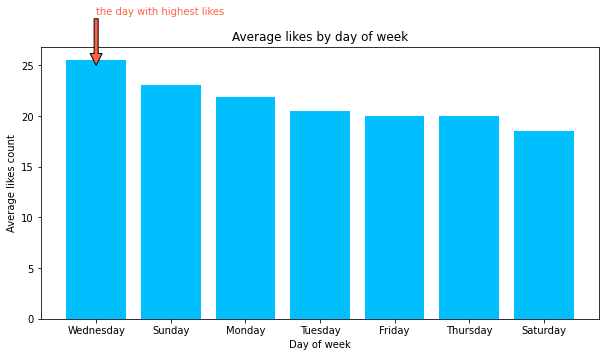

In [494]:
# create new data to get the average likes count for each day of the week
table5=data.groupby(['day_of_week'],as_index=False).agg({'likes_count':'mean'}).\
sort_values(by='likes_count',ascending=False)

# plot the graph to find the weekday with the highest engagement
fig2=plt.figure(figsize=(10,5))
plt.bar(x=table5.day_of_week,height=table5.likes_count,color='deepskyblue')
plt.title('Average likes by day of week')
plt.xlabel('Day of week')
plt.ylabel('Average likes count')

# add annotation
plt.annotate('the day with highest likes',xy=(0,25),xytext=(0,30),arrowprops=dict(facecolor='tomato'),color='tomato')

#### A11: In terms of engagement, what are the top 20 accounts by average number of retweets?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

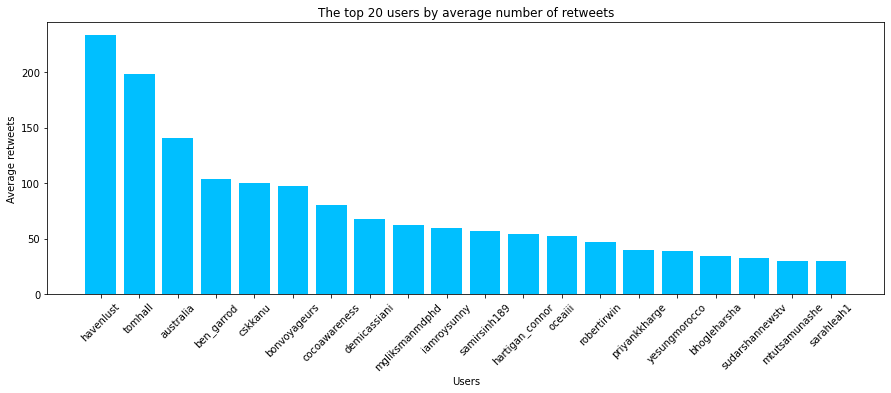

In [495]:
# creat new data to get the top 20 users with the highest average number of retweets
table6= data.groupby(['username'],as_index=False).agg({'retweets_count':'mean'}).\
sort_values(by=['retweets_count'],ascending=[False]).head(20)

# plot the graph to show the most popular users
fig3=plt.figure(figsize=(15,5))
plt.bar(x=table6.username,height=table6.retweets_count,color='deepskyblue')
plt.title('The top 20 users by average number of retweets')
plt.xlabel('Users')
plt.ylabel('Average retweets')
plt.xticks(rotation=45)

#### A12: What about the top accounts by average number of likes per tweet?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

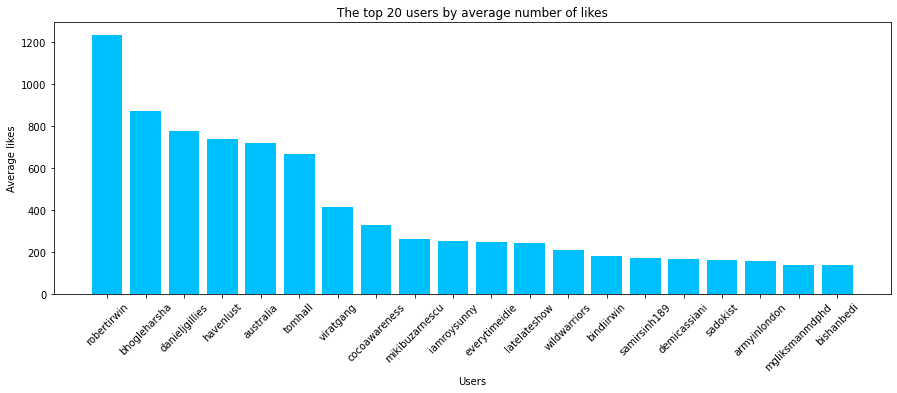

In [496]:
# creat new data to get the top 20 users with the highest average number of likes
table7= data.groupby(['username'],as_index=False).agg({'likes_count':'mean'}).\
sort_values(by=['likes_count'],ascending=[False]).head(20)

# plot the graph to show the most popular users
fig4=plt.figure(figsize=(15,5))
plt.bar(x=table7.username,height=table7.likes_count,color='deepskyblue')
plt.title('The top 20 users by average number of likes')
plt.xlabel('Users')
plt.ylabel('Average likes')
plt.xticks(rotation=45)

#### Q13: We are keen to understand sentiment towards our client.

Can you look at the top 20 tweets (either by number of retweets, number of likes, or some combination), and gauge the sentiment of them? Is it mostly positive? How much is negative? What does the contents of the tweets tell us about public opinion towards the brand? What are people talking about?

Obviously this will involve you doing some manual analysis of the tweet text and content, but we would love to see any kinds of charts or statistics you can come up with to communicate the results.

In [507]:
# sort the data by the number of retweets and number of likes
data=data.sort_values(['retweets_count','likes_count'],ascending=False)

#get the top 20 tweets by the number of retweets and number of likes
data_top_20_tweet = data.iloc[:20]

#only keep the usefull columns to our new dataframe
data_top_20_tweet = data_top_20_tweet[['id','tweet','likes_count','retweets_count']]

data_top_20_tweet

,id,tweet,likes_count,retweets_count
6074,1112471205531906048,It’s a little-known fact that some #koala joey...,6962,1498
10832,1098658761898684418,"Crikey, what a great way to honour an Aussie l...",6244,1469
7774,1107118332564525056,❤️ pic.twitter.com/aRafui2wW2,6075,1331
229,1131152781136547840,RARE SIGHT: Hundreds of post-it notes making t...,4362,939
12568,1094294903029460992,Kangaroo hopping along a white sand beach? Thi...,2975,800
5347,1114467942807351299,Just a few (magnificent!) mates enjoying the w...,2569,707
1181,1128904383113023488,Meanwhile in Australia 😎 This cheeky mob of ...,1961,605
2703,1123301255663820800,"Today is cancelled, go back to bed. 😴 (via @...",3098,537
8164,1106419383436566528,The selfie game is strong with these two! @...,2951,530
13155,1092845396316090373,"Hang in there, mate, we’re already halfway thr...",2908,524


In [508]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence): 
    score = analyser.polarity_scores(sentence) 
    print("{:-<40} {}".format(sentence, str(score)))

In [512]:
#create 4 columns of the scores 'positive', 'negative', 'neutral' and 'compound' 
data_top_20_tweet['compound']=[analyser.polarity_scores(x)['compound'] for x in data_top_20_tweet['tweet']]
data_top_20_tweet['neg'] = [analyser.polarity_scores(x)['neg'] for x in data_top_20_tweet['tweet']]
data_top_20_tweet['neu'] = [analyser.polarity_scores(x)['neu'] for x in data_top_20_tweet['tweet']]
data_top_20_tweet['pos'] = [analyser.polarity_scores(x)['pos'] for x in data_top_20_tweet['tweet']]

# show the full text (not truncated)
pd.set_option('display.max_colwidth', None)

data_top_20_tweet

,id,tweet,likes_count,retweets_count,compound,neg,neu,pos
6074,1112471205531906048,"It’s a little-known fact that some #koala joeys are born with leopard print fur 🐨 We don’t yet know why only certain joeys are blessed with such incredible fashion sense, but we’re sure little April here is the envy of her friends. #seeaustralia #wildlife #australia pic.twitter.com/FJUDwdRk9E",6962,1498,0.8151,0.048,0.749,0.203
10832,1098658761898684418,"Crikey, what a great way to honour an Aussie legend. Today's #GoogleDoodle features @AustraliaZoo's #SteveIrwin, a legendary zookeeper, conservationist and father 🐊 http://bit.ly/IrwinGoogle @GoogleDoodles @googledownunder pic.twitter.com/EVdkdN8Fdo",6244,1469,0.8316,0.000,0.755,0.245
7774,1107118332564525056,❤️ pic.twitter.com/aRafui2wW2,6075,1331,0.0000,0.000,1.000,0.000
229,1131152781136547840,RARE SIGHT: Hundreds of post-it notes making their way towards #BondiBeach! 😱 (Cownose Rays via IG/dronesharkapp in @sydney_sider) #seeaustralia #ilovesydney pic.twitter.com/fgB3G1ACNr,4362,939,-0.7263,0.217,0.783,0.000
12568,1094294903029460992,Kangaroo hopping along a white sand beach? This might just be the most Australian thing you’ll see on your feed today! (via IG/joanna_pka at @westaustralia’s #LuckyBay) #seeaustralia #justanotherdayinwa pic.twitter.com/lQnkO8aO8d,2975,800,0.0000,0.000,1.000,0.000
5347,1114467942807351299,Just a few (magnificent!) mates enjoying the weekend. 🐬🐋 (Dolphins and whales via @jaimenhudson in @westaustralia's #Esperence) #seeaustralia #justanotherdayinwa pic.twitter.com/woTqurUAbv,2569,707,0.8221,0.000,0.715,0.285
1181,1128904383113023488,Meanwhile in Australia 😎 This cheeky mob of kangaroos decided to join a game of @AFL at Woolgoolga in @NewSouthWales Video: via IG/northernbeachesblues #seeaustralia #NewSouthWales pic.twitter.com/Byax4vYFIw,1961,605,0.6369,0.000,0.839,0.161
2703,1123301255663820800,"Today is cancelled, go back to bed. 😴 (via @australiazoo on @queensland's @sunshinecoastoz) #seeaustralia #thisisqueensland pic.twitter.com/F19SO5oY2V",3098,537,-0.2500,0.111,0.889,0.000
8164,1106419383436566528,"The selfie game is strong with these two! @chrishemsworth got his first #quokka selfie on @westaustralia's @rottnestisland this week, and we're not sure if we've seen a more photogenic duo! (via #chrishemsworth) #seeaustralia #justanotherdayinwa pic.twitter.com/qYnsXWccEx",2951,530,0.4445,0.051,0.850,0.100
13155,1092845396316090373,"Hang in there, mate, we’re already halfway through the week 🐨 (Koala Casey via @australiazoo, @queensland) #seeaustralia #thisisqueensland pic.twitter.com/BAaTpE6lKR",2908,524,0.0000,0.000,1.000,0.000


In [513]:
# descriptive statistics of the sentiment scores
data_top_20_tweet['compound'].describe()

count    20.000000
mean      0.242525
std       0.434881
min      -0.726300
25%       0.000000
50%       0.000000
75%       0.639575
max       0.831600
Name: compound, dtype: float64

In [514]:
# how many positive tweets in top20 tweets
len(data_top_20_tweet[data_top_20_tweet['compound']>0] )

9

In [515]:
# how many negative tweets in top20 tweets
len(data_top_20_tweet[data_top_20_tweet['compound']<0] )

3

In [517]:
# how many with a score zero in top20 tweets
len(data_top_20_tweet[data_top_20_tweet['compound']==0] )

8

#### A13: 
- By analysing the sentiment of the tweets, we can see that of the 20 most active tweets, 9 are positive, 3 are negative and the remaining 8 have a score of 0；
- It was found that positive sentiment is more than negative sentiment, which shows that the majority of the public prefer the content of these tweets 
- However, the negative opinions are more valuable than the positive for brand，by manual analyzing the 3 negative tweet, they are found not to be really negative，the tweets contain Word ambiguity and Multipolarity.
- These top 20 most active tweets discussing Australia's weather, environment, wildlife and tourism

## Conclusion

#### Findings

- By analysing the total number of likes and retweets, total number of tweet sent by users, we got the top 20 visible users and top 20 active users, most of whom are official accounts, organisations and celebrities, the first of both as User ‘Australia’;
- By analysing the average of likes and retweets, we get different most active users, with the first user ‘Australia’ dropping to third place and fifth place; and the 20 most active users have many more individual users
- By analysing the number of most active weekdays by likes and retweets, the chart clearly shows that the most active day of the week is Wednesday;
- By analysing the sentiment of the tweets, then manual analysing the negative tweets, The analysis clearly shows that the majority of the tweets are positive，which means the majority of the public prefer the content of these tweets 
-These top 20 most active tweets  are mainly in the form of storytelling about the weather in Australia Australia's weather, environment, wildlife and tourism

#### Recommendation:

- Increasing interaction with active users by liking, replying to and retweeting content from the most active users whenever possible. 
- Posting Tweets on Wednesdays maximise the chance to get more engagement, seek more attention and avoid unnecessary distractions 
- Posting story-based tweets through each update and connection to show followers what the brand wants to communicate
- if the users contained in this dataset voluntarily agree to participate;
- The real user name in the data may be harmful to the user and has privacy implications, we recommend encryption measures
- It is recommended that some incentive be given to users who are included in the data to ensure a fair distribution of benefits